# Setup

In [4]:
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt   
import matplotlib.patches as mpathces 
import seaborn as sns 

# sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler

# sequential model modeling 
import tensorflow as tf
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation, BatchNormalization 
from keras import optimizers, metrics, callbacks

# GoodleDrive mount
from google.colab import drive   
drive.mount('/content/drive')

Mounted at /content/drive


# 0.Data Load

# 1.Pre-processing
1. Label Encoding: categorical values `LINE`, `PRODUCT_CODE`
2. Missing values: fillna(0) 
3. scaling: StandardScaler

In [227]:
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')
submit = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')

train_x = train_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP', 'Y_Class','Y_Quality'])
train_y = train_df['Y_Class']
test_x = test_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP'])   

# 1) qualitative to quantitative
qual_col = ['LINE', 'PRODUCT_CODE']
for i in qual_col:
    le = LabelEncoder()    # TRY one-hot encoding 
    le = le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])
    for label in np.unique(test_x[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_x[i] = le.transform(test_x[i]) 

# 2) Missing Values 
train_x = train_x.fillna(0)
test_x = test_x.fillna(0)

from imblearn.over_sampling import SMOTE
train_x, train_y = SMOTE(random_state=37).fit_resample(train_x, train_y)

# 3) scaling: only `X_???` values (continuous)
Xs = train_x.select_dtypes(include=float).iloc[:,1:].columns.tolist()
scaler = StandardScaler().fit(train_x.loc[:, Xs])
train_x.loc[:, Xs] = scaler.transform(train_x.loc[:, Xs])
test_x.loc[:, Xs] = scaler.transform(test_x.loc[:, Xs])
print('Done.')  

Done.


In [228]:
model = Sequential([
        # Input layer: ReLU (decide input size according to dimension)
        Dense(512, activation='relu', input_shape=(train_x.shape[-1],)),      

        # layer2: softmax  (output layer)
        Dense(3, activation='softmax')
        ])


model.compile(
    optimizer = optimizers.Adam(1e-4),  # decrease learning rate (default learning rate=1e-3) 
    # optimizer='adam',
                   loss='sparse_categorical_crossentropy',  # tow or more label classes (`Y_Class`: 0,1,2)
                   metrics=['accuracy'])

history = model.fit(train_x, train_y,
                    epochs=10,
                    batch_size=128,  # batch size: 2^x && half of data size(598/2) 
                    validation_split=0.2,
                    # callbacks=callbacks
                    )   

Epoch 1/10
8/8 [==============================] - 1s 28ms/step - loss: 1.0987 - accuracy: 0.5123 - val_loss: 1.6869 - val_accuracy: 0.1429
Epoch 2/10
8/8 [==============================] - 0s 7ms/step - loss: 0.8770 - accuracy: 0.6189 - val_loss: 1.6396 - val_accuracy: 0.4000
Epoch 3/10
8/8 [==============================] - 0s 7ms/step - loss: 0.8085 - accuracy: 0.6639 - val_loss: 1.2069 - val_accuracy: 0.2939
Epoch 4/10
8/8 [==============================] - 0s 8ms/step - loss: 0.7569 - accuracy: 0.6793 - val_loss: 1.2616 - val_accuracy: 0.4735
Epoch 5/10
8/8 [==============================] - 0s 8ms/step - loss: 0.7092 - accuracy: 0.7059 - val_loss: 1.1468 - val_accuracy: 0.4490
Epoch 6/10
8/8 [==============================] - 0s 8ms/step - loss: 0.6949 - accuracy: 0.7100 - val_loss: 1.0980 - val_accuracy: 0.5306
Epoch 7/10
8/8 [==============================] - 0s 7ms/step - loss: 0.6596 - accuracy: 0.7336 - val_loss: 1.1839 - val_accuracy: 0.4245
Epoch 8/10
8/8 [=================

In [229]:
# a = pd.DataFrame(test_x)
preds = model.predict(test_x)
a=[]
for i in preds: 
    i = list(i)
    a.append(i.index(max(i)))
a  

10/10 [==============================] - 0s 2ms/step


[1,
 1,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,


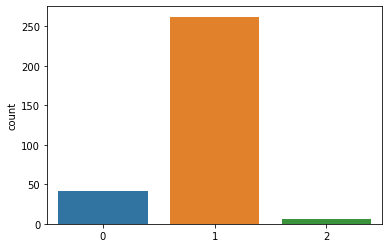

In [230]:
submit = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')
submit['Y_Class'] = a

submit.to_csv('smartFactory_submission.csv', index=False)
sns.countplot(x=a);  

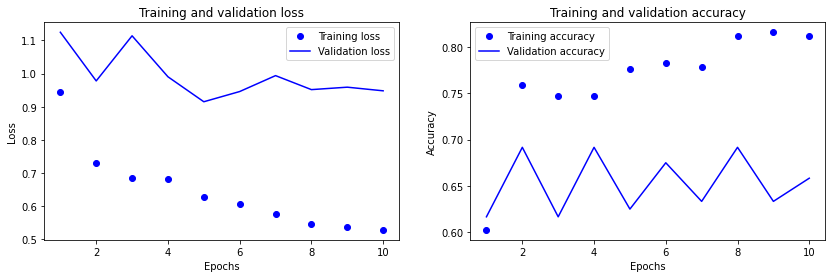

In [193]:
epochs = range(1, len(history.history["loss"]) + 1)

fig, axes = plt.subplots(1,2,figsize=(14,4))
ax= axes.flatten()
a, b = ax[0], ax[1]

a.plot(epochs, history.history["loss"], "bo", label="Training loss")
a.plot(epochs, history.history["val_loss"], "b", label="Validation loss")
a.set_title("Training and validation loss")
a.set_xlabel("Epochs")
a.set_ylabel("Loss")
a.legend()   

b.plot(epochs, history.history["accuracy"], "bo", label="Training accuracy")
b.plot(epochs, history.history["val_accuracy"], "b", label="Validation accuracy")
b.set_title("Training and validation accuracy")
b.set_xlabel("Epochs")
b.set_ylabel("Accuracy")
b.legend();

# 4.Submit

# THE END